### Toric Code as a Graph Product
* Let us construct toric code in terms of the graph product picture.
* This involves starting with two cycles and taking their cartesian graph product

In [10]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from typing import List

In [11]:
def tanner_to_parity_check_mat(G: nx.Graph) -> np.array:
    """
    Converts Tanner graph 'G' into parity check matrix

    Parameters:
    -----------
    G - Tanner graph
    """
    num_var_nodes = 0
    num_check_nodes = 0
    check_node_list = []
    G_nodes = list(G.nodes)
    G_edges = list(G.edges)
    for node in G_nodes:
        if (node[0] == 'v'):
            num_var_nodes += 1
        else:
            num_check_nodes += 1
    
    mat = np.zeros((num_check_nodes, num_var_nodes))
    for edge in G_edges:
        if (edge[0][0] == 'c'):
            mat[int(edge[0][1])][int(edge[1][1])] = 1
        else:
            mat[int(edge[1][1])][int(edge[0][1])] = 1
    pc_mat_1 = nx.incidence_matrix(tan_graph_1)

def parity_check_mat_to_tanner(mat: np.array) -> nx.Graph:
    """ 
    Converts parity check matrix 'mat' into Tanner graph

    Parameters:
    -----------
    mat - parity check matrix
    """
    num_var_nodes = mat.shape[1]
    num_check_nodes = mat.shape[0]
    tan_graph = nx.Graph();
    for i in range(num_var_nodes):
        tan_graph.add_node("v" + str(i))

    for j in range(num_check_nodes):
        tan_graph.add_node("c" + str(j))

    for i in range(mat.shape[0]):
        for j in range(mat.shape[1]):
            if (mat[i][j] == 1):
                tan_graph.add_edge("c" + str(i), "v" + str(j))
    
    return tan_graph

In [12]:
def parity_check_to_generator(H: np.array) -> np.array:
    """ 
    Converts parity-check matrix for a code to the generator 
    matrix for that code 

    Parameters:
    -----------
    H - parity-check matrix
    """
    pass 

def generator_to_parity_check(G: np.array) -> np.array:
    """ 
    Converts generator matrix for code to parity-check matrix 
    for that code

    Parameters:
    -----------
    G - generator matrix
    """
    pass

In [34]:
def prod_code_vars(G: nx.Graph) -> List:
    """ 
    Returns list of variable nodes in product code graph

    Parameters:
    -----------
    G - product code graph
    """
    check_node_list = []
    for tup in list(G.nodes):
        if (tup[0][0] == 'v' and tup[1][0] == 'v') or (tup[0][0] == 'c' and tup[1][0] == 'c'):
            check_node_list.append(tup)
    return check_node_list

def prod_code_checks_X(G: nx.Graph) -> List:
    """ 
    Returns list of check nodes for X checks in product code graph

    Parameters:
    -----------
    G - product code graph
    """
    X_check_var_list = []
    for tup in list(G.nodes):
        if (tup[0][0] == 'c' and tup[1][0] == 'v'):
            X_check_var_list.append(tup)
    return X_check_var_list

def prod_code_checks_Z(G: nx.Graph) -> List:
    """ 
    Returns list of check nodes for Z checks in product code graph

    Parameters:
    -----------
    G - product code graph
    """
    Z_check_var_list = []
    for tup in list(G.nodes):
        if (tup[0][0] == 'v' and tup[1][0] == 'c'):
            Z_check_var_list.append(tup)
    return Z_check_var_list

def parity_check_mat_X(G: nx.Graph, check_nodes_X: List, var_nodes: List) -> np.array:
    """ 
    Returns the H_X parity-check matrix

    Parameters:
    -----------
    G - product code graph
    check_nodes_X - list of check nodes involved in X checks of product code
    var_nodes - list of variable nodes of Tanner graph of product code 
    """
    num_check_nodes_X = len(check_nodes_X)
    num_var_nodes = len(var_nodes)
    x_mat = np.zeros((num_check_nodes_X, num_var_nodes))
    for i in range(num_check_nodes_X):
        for nbr in nx.neighbors(G, check_nodes_X[i]):
            x_mat[i][var_nodes.index(nbr)] = 1
    return x_mat

def parity_check_mat_Z(G: nx.Graph, check_nodes_Z: List, var_nodes: List) -> np.array:
    """ 
    Returns the H_Z parity-check matrix

    Parameters:
    -----------
    G - product code graph
    check_nodes_Z - list of check nodes involved in Z checks of product code
    var_nodes - list of variable nodes of Tanner graph of product code
    """
    num_check_nodes_Z = len(check_nodes_Z)
    num_var_nodes = len(var_nodes)
    z_mat = np.zeros((num_check_nodes_Z, num_var_nodes))
    for i in range(num_check_nodes_Z):
        for nbr in nx.neighbors(G, check_nodes_Z[i]):
            z_mat[i][var_nodes.index(nbr)] = 1
    return z_mat

The parity check matrix for X is
[[1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1.]]


The parity check matrix for Z is
[[1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0.

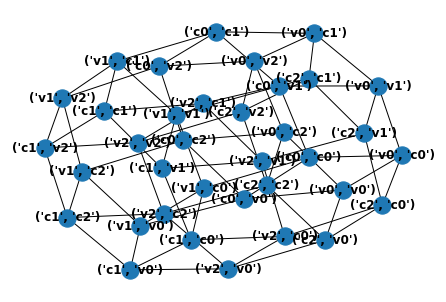

In [39]:
mat = np.array([
    [1,1,0],
    [0,1,1],
    [1,0,1]
])
tan_graph_1 = parity_check_mat_to_tanner(mat)
tan_graph_2 = parity_check_mat_to_tanner(mat)
#nx.draw(tan_graph_1, with_labels=True, font_weight='bold')
toric_code = nx.cartesian_product(tan_graph_1, tan_graph_2)
nx.draw(toric_code, with_labels=True, font_weight='bold')
var_node_list = prod_code_vars(toric_code)
#print("The variable nodes are")
#print(var_node_list)
#print("\n")
X_check_list = prod_code_checks_X(toric_code)
#print("The X check qubits are")
#print(X_check_list)
#print("\n")
Z_check_list = prod_code_checks_Z(toric_code)
#print("The Z check qubits are")
#print(Z_check_list)
#print("\n")
edge_list = toric_code.edges
#print("The edges of the above graph are")
#print(edge_list)
#print("\n")
X_parity_check_mat = parity_check_mat_X(toric_code, X_check_list, var_node_list)
Z_parity_check_mat = parity_check_mat_Z(toric_code, Z_check_list, var_node_list)
print("The parity check matrix for X is")
print(X_parity_check_mat)
print("\n")
print("The parity check matrix for Z is")
print(Z_parity_check_mat)
print("\n")


In [3]:
def construct_C_X(m: int) -> nx.Graph:
    """
    Constructs the Tanner Graph corresponding to a cycle code of length 'm' for the X-checks

    Parameters:
    -----------
    m - length of cycle code
    """
    graph_C_X = nx.Graph()
    num_var_nodes = 2 * m
    num_check_nodes = m
    var_node_list = []
    check_node_list = []

    # Add all variable and check nodes to graph
    for i in range(num_var_nodes):
        graph_C_X.add_node("v" + str(i))

    for i in range(num_check_nodes):
        graph_C_X.add_node("c" + str(i))

    var_node_list = [var for var in list(graph_C_X.nodes) if var[0] == "v"]
    check_node_list = [check for check in list(graph_C_X.nodes) if var[0] == "c"]
    

    # Add all edges where an edge exists between a variable node and a check node 
    # if that particular variable node is involved in the connected check
    
    


def construct_C_Z(m: int) -> nx.Graph:
    """
    Constructs the Tanner Graph corresponding to a cycle code of length 'm' for the Z-checks

    Parameters:
    -----------
    m - length of cycle code
    """
    graph_C_Z = nx.Graph()
    num_var_nodes = 2 * m
    num_check_nodes = m

    # Add all variable and check nodes to graph
    for i in range(num_var_nodes):
        graph_C_Z.add_node("v" + str(i))

    for i in range(num_check_nodes):
        graph_C_Z.add_node("c" + str(i))

    # Add all edges where an edge exists between a variable node and a check node 
    # if that particular variable node is involved in the connected check